<a href="https://colab.research.google.com/github/omkarade/A-to-Z-Approach-on-Time-Series-And-Forecasting./blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!pip install pmdarima
! mkdir ~/.kaggle
from google.colab import files
files.upload()

In [ ]:
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c store-sales-time-series-forecasting
! unzip store-sales-time-series-forecasting.zip

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')


In [ ]:
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


#**ANALYSIS OF TRAIN DATASET**

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [ ]:
train = pd.merge(train, stores, how='left', on='store_nbr')


**TIME SERIES AVG SALES ON EACH DAY**

In [ ]:
train_aux = train[['date', 'sales', 'onpromotion']].groupby('date').mean()
train_aux = train_aux.reset_index()
fig = go.Figure(data=go.Scatter(x=train_aux['date'], y=train_aux['sales'],marker_color='red', text="sales"))
fig.update_layout({"title": f'Avg Sales by date for all stores and products',"xaxis": {"title":"Date"},"yaxis": {"title":"Avg Unit Sold"},"showlegend": False})
fig.show()



*  **Increasing trend of the sales.**
*  **In the last two years (since July 2015) the trend has been stable (almost stationary TS).**
*   **By zooming in one can realize that there is a seasonality every 7 days, same pattern (during the weekends higher sales). The peak of the weekly sesoanlity is on Sundays/Saturdays.**
*   **The 1st of Jan of every year the supermarkets are not open (sales=0).**





**ON PROMOTION VS AVG SALES CHART**

In [ ]:
fig = px.scatter(train_aux[train_aux['onpromotion'] > 0], x="onpromotion", y="sales", color='sales', color_continuous_scale="earth",size='sales', log_x=True, size_max=30)

fig.update_layout({"title": f'Correlation between OnPromotion and Sales (total avg sales and promotion on each day)',"xaxis": {"title":"On Promotion"},"yaxis": {"title":"Sales"},"showlegend": False})
fig.show()




***   There is a positive correlation between onpromotion and sales units sold. Thus, when more items of the supermarkets are on promotion, it's more likely to sell them. It means that the price elasticity of some items is high and the demand of some items in the sumermarkets is highly correlated to cjanges in price of the itrems.**

***   What family products have higher elasticity? I guess that the data scientist at Favorita supermarkets have done that analysis. They have determined what product are more sensitve to changes in price by maximixing the revenue.**




**AVG SALES/ON PROMOTION BY YEAR, MONTH AND DAY OF WEEK CHARTS**

In [ ]:
#create new features
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.strftime("%B")
train['day_of_week'] = pd.to_datetime(train['date']).dt.day_name()


In [ ]:
df_year_s = train.groupby('year').mean()[['sales']]
df_year_s = df_year_s.reset_index()
df_year_s['color'] =['rgb(210, 251, 212)', 'rgb(165, 219,194)', 'rgb(123,188, 176)', 'rgb(85, 156,158)', 'rgb(58,124, 137)']

df_month_s = train.groupby('month').mean()[['sales']]
df_month_s = df_month_s.sort_values('sales', ascending=True)
df_month_s['color'] = ['#bfbf40','#abab39','#989833','#85852c','#727226','#5f5f20','#5f5f20','#4c4c19','#393913','#26260c','#131306','#000000']
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_month_s = df_month_s.reindex(new_order, axis=0)
df_month_s = df_month_s.reset_index()


df_day_of_week_s = train.groupby('day_of_week').mean()[['sales']]
df_day_of_week_s = df_day_of_week_s.sort_values('sales', ascending=False)
df_day_of_week_s['color'] = ['rgb(255, 0, 0)','rgb(255, 36, 36)','rgb(255, 71, 71)','rgb(255, 107, 107)','rgb(255, 143, 143)','rgb(255, 179, 179)','rgb(255, 214, 214)']
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_of_week_s = df_day_of_week_s.reindex(new_order_week, axis=0)
df_day_of_week_s = df_day_of_week_s.reset_index()


In [ ]:
df_year = train.groupby('year').mean()[['onpromotion']]
df_year = df_year.reset_index()
df_year['color'] =['rgb(210, 251, 212)', 'rgb(165, 219,194)', 'rgb(123,188, 176)', 'rgb(85, 156,158)', 'rgb(58,124, 137)']
df_month = train.groupby('month').mean()[['onpromotion']]
df_month = df_month.sort_values('onpromotion', ascending=True)
df_month['color'] = ['#bfbf40','#abab39','#989833','#85852c','#727226','#5f5f20','#5f5f20','#4c4c19','#393913','#26260c','#131306','#000000']
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_month = df_month.reindex(new_order, axis=0)
df_month = df_month.reset_index()
df_day_of_week = train.groupby('day_of_week').mean()[['onpromotion']]
df_day_of_week = df_day_of_week.sort_values('onpromotion', ascending=False)
df_day_of_week['color'] = ['rgb(255, 0, 0)','rgb(255, 36, 36)','rgb(255, 71, 71)','rgb(255, 107, 107)','rgb(255, 143, 143)','rgb(255, 179, 179)','rgb(255, 214, 214)']
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_of_week = df_day_of_week.reindex(new_order_week, axis=0)
df_day_of_week = df_day_of_week.reset_index()

In [ ]:
fig = make_subplots(rows=3, cols=2, subplot_titles=("Avg Sales by Year", "Avg On Promotion by Year", "Avg Sales by Month","Avg On Promotion by MOnth", "Avg Sales by Day of Week", "Avg On Promotion by Day of Week"))
fig.append_trace(go.Bar(x=df_year_s['year'], y=df_year_s['sales'], marker = {'color': list(df_year_s['color'])}),row=1, col=1)
fig.append_trace(go.Bar(x=df_month_s['month'], y=df_month_s['sales'], marker = {'color': list(df_month_s['color'])}), row=2, col=1)
fig.append_trace(go.Bar(x=df_day_of_week_s['day_of_week'], y=df_day_of_week_s['sales'], marker = {'color': list(df_day_of_week_s['color'])}), row=3, col=1)
##ONPROMOTION
fig.append_trace(go.Bar(x=df_year['year'], y=df_year['onpromotion'], marker = {'color': list(df_year['color'])}),row=1, col=2)
fig.append_trace(go.Bar(x=df_month['month'], y=df_month['onpromotion'], marker = {'color': list(df_month['color'])}), row=2, col=2)
fig.append_trace(go.Bar(x=df_day_of_week['day_of_week'], y=df_day_of_week['onpromotion'],marker = {'color': list(df_day_of_week['color'])}), row=3, col=2)
#styling
fig.update_layout(height=1000, width=1400, title_text="AVERAGE SALES & ONPROMOTION ANALYSIS",  title_font=dict(size=30, color='#8a8d93'), showlegend=False)
fig.show()



*   **There's an increasing trend in sales every year. It probably has to do with the decrease in oil prices (as it gives more purchasing power to consumers) or with growing econonmic conditions of Ecuador.**

*   **December is the month with the highst average units sold (Christmas is in December).**


*   **During the weekends customers purchase more compared to week days.**


*   **There has been an exponential increase in teh promotions trhoughout the years. No promotions in 2013.**







**Sesonality of All the Time Series**

In [ ]:
df_sesonality = train.copy()

df_sesonality = df_sesonality.groupby('date').mean()[['sales']].reset_index()
#create month and year variables from date colum
df_sesonality['date'] = pd.to_datetime(df_sesonality['date'])
df_sesonality['year'] = df_sesonality['date'].dt.year
df_sesonality['month'] = df_sesonality['date'].dt.month
df_sesonality['weekofyear'] = df_sesonality['date'].dt.weekofyear
df_sesonality['day'] = df_sesonality['date'].dt.day
df_sesonality['dayofweek'] = df_sesonality['date'].dt.day_name()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

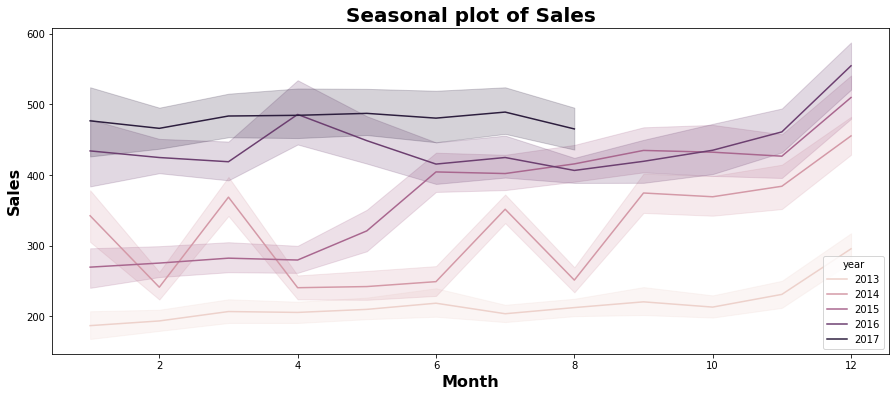

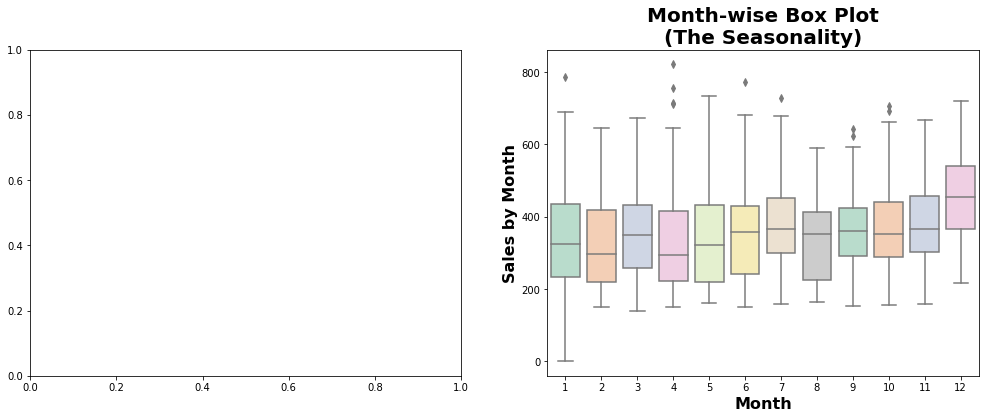

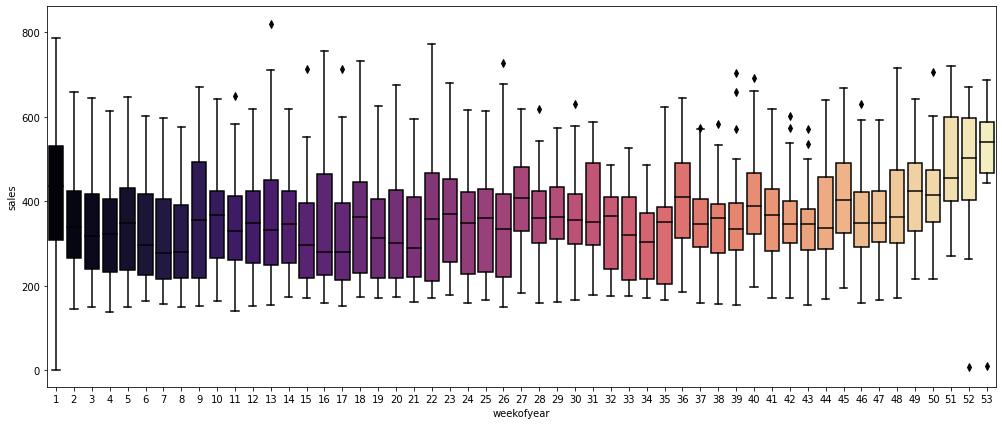

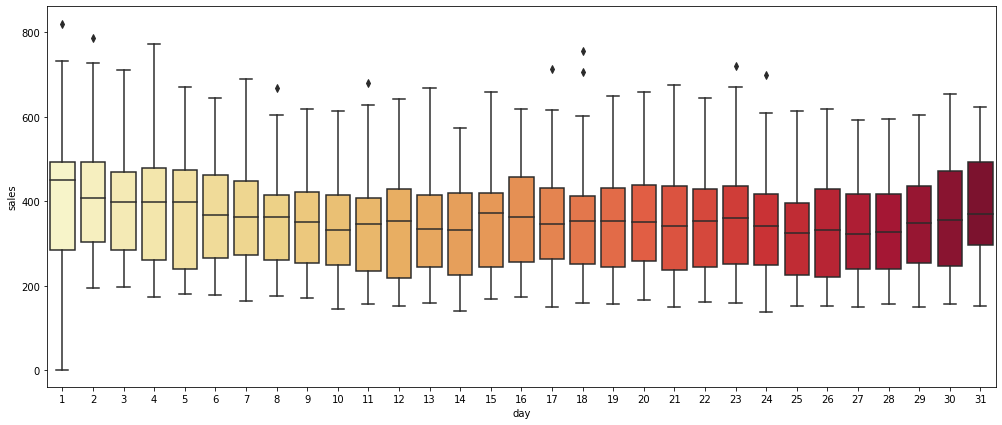

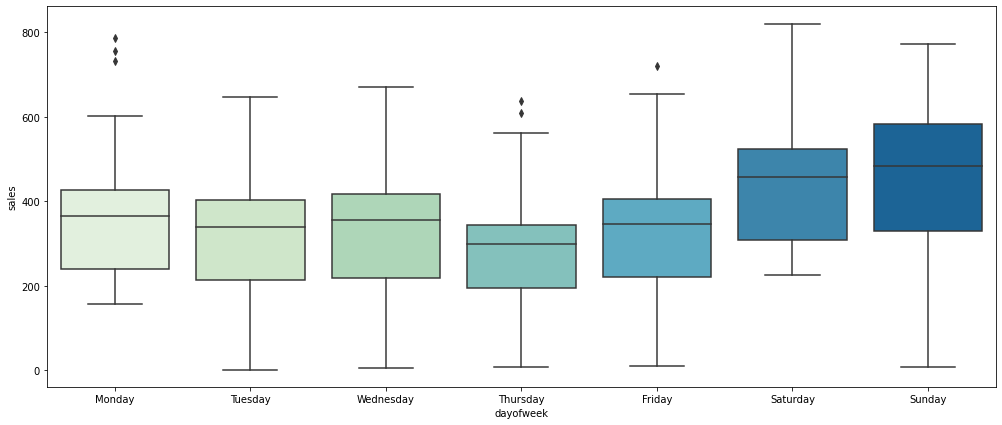

In [ ]:
variable = 'sales'
fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(df_sesonality['month'], df_sesonality[variable], hue=df_sesonality['year'])
ax.set_title('Seasonal plot of Sales', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Sales', fontsize = 16, fontdict=dict(weight='bold'))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))
sns.boxplot(df_sesonality['month'], df_sesonality[variable], palette="Pastel2", ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Sales by Month', fontsize = 16, fontdict=dict(weight='bold'))
fig = plt.figure(figsize=(17,7))
sns.boxplot(df_sesonality['weekofyear'], df_sesonality['sales'], palette="magma")
fig = plt.figure(figsize=(17,7))
sns.boxplot(df_sesonality['day'], df_sesonality['sales'], palette="YlOrRd")
fig = plt.figure(figsize=(17,7))
sns.boxplot(df_sesonality['dayofweek'], df_sesonality['sales'], palette="GnBu",order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])

*    **We can see different sesonal patterns in the day of the week, day, week of year and month. For the feature engineering part, we will derive these features from the date column.**

**Lags of Sales Variable**

In [ ]:
LAGS = [7,15, 21, 28, 29, 35, 42, 49, 56]


In [ ]:
df_lag = train.copy()
for lag in LAGS:
    df_lag[f"sales_lag_{lag}"] = df_lag.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.shift(lag))


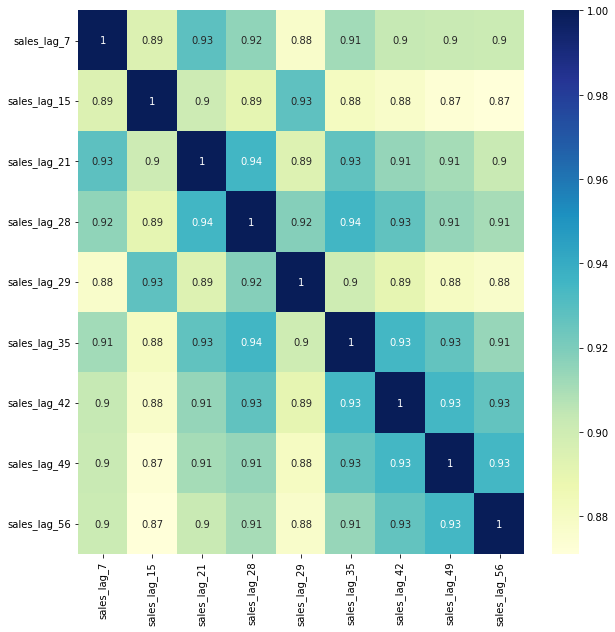

In [ ]:
df_lag_corr = df_lag[[col for col in list(df_lag.columns) if col.startswith('sales_')]]
plt.figure(figsize=(10,10))
sns.heatmap(df_lag_corr.corr(), annot=True, cmap="YlGnBu")
plt.show()




*   **A lag plot is used to help evaluate whether the values in a dataset or time series are random. If the data are random, the lag plot will exhibit no identifiable pattern. If the data are not random, the lag plot will demonstrate a clearly identifiable pattern. The type of pattern can aid the user in identifying the non-random structure in the data. Lag plots can also help to identify outliers**



In [ ]:
category = 'BEVERAGES'
STORE_NBR = 45
df_aux = df_lag[(df_lag['family'] == category) & (train['store_nbr'] == STORE_NBR)]
xlim = (0, 26000)
ylim = (0, 26000)


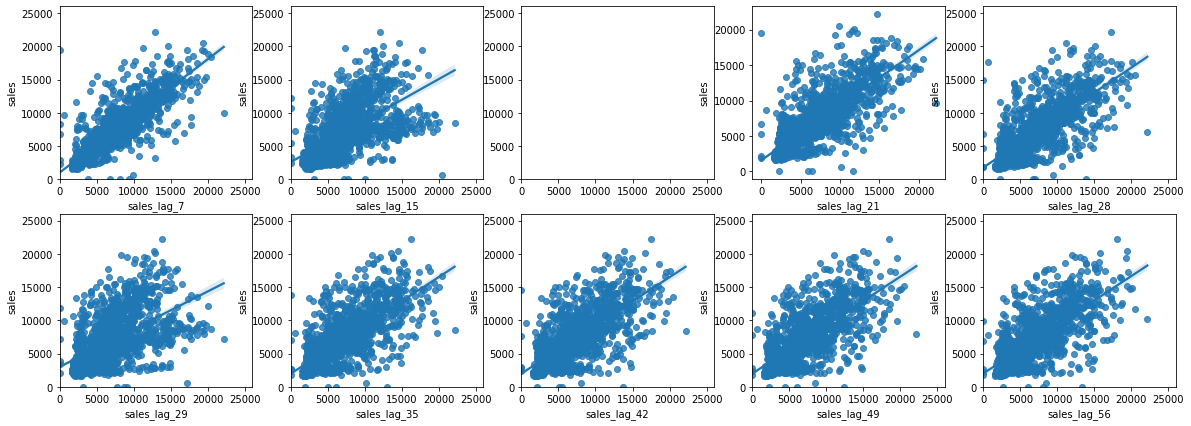

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20,7))
axes[0,0].set_xlim(xlim)
axes[0,0].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_7", y="sales", ax=axes[0,0])
axes[0,1].set_xlim(xlim)
axes[0,1].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_15", y="sales",  ax=axes[0,1])
axes[0,2].set_xlim(xlim)
axes[0,2].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_21", y="sales",  ax=axes[0,3])
axes[0,4].set_xlim(xlim)
axes[0,4].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_28", y="sales",  ax=axes[0,4])
axes[1,0].set_xlim(xlim)
axes[1,0].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_29", y="sales",  ax=axes[1,0])
axes[1,1].set_xlim(xlim)
axes[1,1].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_35", y="sales",  ax=axes[1,1])
axes[1,2].set_xlim(xlim)
axes[1,2].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_42", y="sales",  ax=axes[1,2])
axes[1,3].set_xlim(xlim)
axes[1,3].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_49", y="sales",  ax=axes[1,3])
axes[1,4].set_xlim(xlim)
axes[1,4].set_ylim(ylim)
sns.regplot(data=df_aux, x="sales_lag_56", y="sales",  ax=axes[1,4])




*   **From above all EDA i find some insides like lag feture very usful and in december months the sell get more and more i find which can help me to fit a model and reduce mean_absolute_error**
